In [65]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

### 1 - Data Prep

In [21]:
# load the excel data into Pandas dataframe
raw_df = pd.read_csv('CTG_raw.csv')
raw_df.head()

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,Variab10.txt,12/1/96,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
1,Fmcs_1.txt,5/3/96,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
2,Fmcs_1.txt,5/3/96,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,5/3/96,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,5/3/96,CTG0005.txt,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0


In [28]:
# combine NSP labels into two groups (Normal=1, Abnormal=0)
raw_df['NSP'] = np.where(raw_df['NSP']==1,1,0)

### 2 - Naive Bayes

In [41]:
# drop NaN from df
model_df = raw_df.copy()[['LB','ALTV','Min','Mean','NSP']].dropna()

In [45]:
from sklearn.model_selection import train_test_split

# Group 1 LB, ALTV, Min, Mean
X = model_df.copy()[['LB','ALTV','Min','Mean']].to_numpy()
y = model_df.copy()[['NSP']].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)

Naive Bayes Confusion Matrix: 
 [[113 123]
 [ 59 768]]

Naive Bayes Accuracy: 0.83


/Users/ndeen/opt/anaconda3/envs/sandbox/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(83.40000000000006, 0.5, 'predicted label')

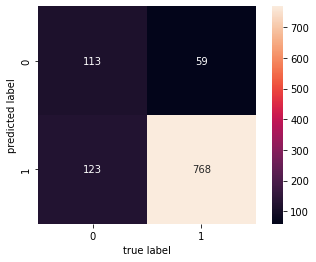

In [58]:
model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Confusion Matrix
nb_mat = confusion_matrix(y_test, y_pred)
print("Naive Bayes Confusion Matrix: \n", nb_mat)

# Accuracy
nb_acc = accuracy_score(y_test, y_pred)
print("\nNaive Bayes Accuracy:", round(nb_acc,2))

sns.heatmap(nb_mat.T,square=True, annot=True, fmt = 'd', cbar=True)
plt.xlabel('true label')
plt.ylabel('predicted label')

### 3 - Decision Tree

Decision Tree Confusion Matrix: 
 [[172  64]
 [ 71 756]]

Decision Tree  Accuracy: 0.87


Text(83.40000000000006, 0.5, 'predicted label')

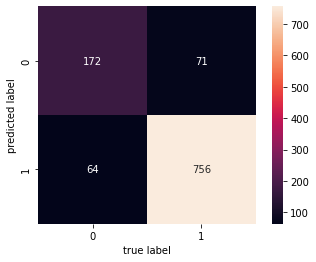

In [62]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Confusion Matrix
dt_mat = confusion_matrix(y_test, y_pred)
print("Decision Tree Confusion Matrix: \n", dt_mat)

# Accuracy
dt_acc = accuracy_score(y_test, y_pred)
print("\nDecision Tree  Accuracy:", round(dt_acc,2))

sns.heatmap(dt_mat.T,square=True, annot=True, fmt = 'd', cbar=True)
plt.xlabel('true label')
plt.ylabel('predicted label')

### 4 - Random Forest

In [72]:
acc_l = []

for n in range(1,11):
    for d in range(1,6):
        model = RandomForestClassifier(n_estimators=n, max_depth=d, criterion="entropy")
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        # Confusion Matrix
        #rf_mat = confusion_matrix(y_test, y_pred)
        #print("Decision Tree Confusion Matrix: \n", rf_mat)

        # Accuracy
        rf_acc = accuracy_score(y_test, y_pred)
        acc_l.append([(n,d),rf_acc])

/var/folders/x9/2w_yb2vs3bd5qx2pdcj080dr0000gq/T/ipykernel_13859/1254028663.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
/var/folders/x9/2w_yb2vs3bd5qx2pdcj080dr0000gq/T/ipykernel_13859/1254028663.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
/var/folders/x9/2w_yb2vs3bd5qx2pdcj080dr0000gq/T/ipykernel_13859/1254028663.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
/var/folders/x9/2w_yb2vs3bd5qx2pdcj080dr0000gq/T/ipykernel_13859/1254028663.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

In [73]:
acc_df = pd.DataFrame(acc_l, columns = ['N-D','Acc'])

In [74]:
acc_df.head()

,N-D,Acc
0,"(1, 1)",0.809972
1,"(1, 2)",0.806209
2,"(1, 3)",0.843838
3,"(1, 4)",0.836312
4,"(1, 5)",0.870179


<AxesSubplot:xlabel='N-D'>

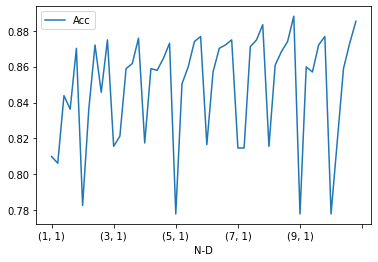

In [75]:
# plot error rates and find the best combination of N and d
acc_df.plot('N-D','Acc')

The best combination of *N* and *d* is *N* = 9 and *d* = 1. This combination yields and accuracy of 0.88.

In [80]:
n = 9
d = 1
# Confusion matrix
model = RandomForestClassifier(n_estimators=n, max_depth=d, criterion="entropy")
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Confusion Matrix
rf_mat = confusion_matrix(y_test, y_pred)
print("Random Forest Confusion Matrix: \n", rf_mat)

Random Forest Confusion Matrix: 
 [[ 34 202]
 [ 11 816]]


/var/folders/x9/2w_yb2vs3bd5qx2pdcj080dr0000gq/T/ipykernel_13859/1106178580.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


### 5 - Summary

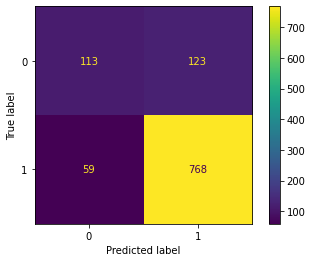

In [85]:
from sklearn.metrics import ConfusionMatrixDisplay

# look at the naive bayes plot to ensure the right calculations/labels
disp = ConfusionMatrixDisplay(confusion_matrix=nb_mat)
disp.plot()

In [91]:
# calculate metrics

# naive bayes
nb_tn = nb_mat[0][0]
nb_fn = nb_mat[1][0]
nb_tp = nb_mat[1][1]
nb_fp = nb_mat[1][0]
nb_tpr = nb_tp / (nb_tp + nb_fn)
nb_tnr = nb_tn / (nb_tn + nb_fp)

# decision tree
dt_tn = dt_mat[0][0]
dt_fn = dt_mat[1][0]
dt_tp = dt_mat[1][1]
dt_fp = dt_mat[1][0]
dt_tpr = dt_tp / (dt_tp + dt_fn)
dt_tnr = dt_tn / (dt_tn + dt_fp)

# random forest
rf_tn = rf_mat[0][0]
rf_fn = rf_mat[1][0]
rf_tp = rf_mat[1][1]
rf_fp = rf_mat[1][0]
rf_tpr = rf_tp / (rf_tp + rf_fn)
rf_tnr = rf_tn / (rf_tn + rf_fp)

In [93]:
summary = [['Naive Bayesian', nb_tp, nb_fp, nb_tn, nb_fn, nb_acc, nb_tpr, nb_tnr],
        ['Decision Tree', dt_tp, dt_fp, dt_tn, dt_fn, dt_acc, dt_tpr, dt_tnr],
        ['Random Forest', rf_tp, rf_fp, rf_tn, rf_fn, rf_acc, rf_tpr, rf_tnr],
        ]

summary_df = pd.DataFrame(summary, columns=['Model',' TP','FP','TN','FN','Accuracy','TPR','TNR'])
summary_df.head()

,Model,TP,FP,TN,FN,Accuracy,TPR,TNR
0,Naive Bayesian,768,59,113,59,0.828786,0.928658,0.656977
1,Decision Tree,756,71,172,71,0.873001,0.914148,0.707819
2,Random Forest,816,11,34,11,0.885230,0.986699,0.755556


Based on these results, the random forest model produces the highest accuracy. This is a function of the high number of positive results. I believe this could be because of the continuous variables used to identify the fetus' abnormality status. If there are very strict cutoffs, it may be easier for a decision tree / random forest model to separate the classes.